Linear Regression Coefficients:
Intercept: 5.24
feature_1: 1.74
feature_2: -1.92
feature_3: 3.46
feature_4: 0.54
feature_5: -2.31


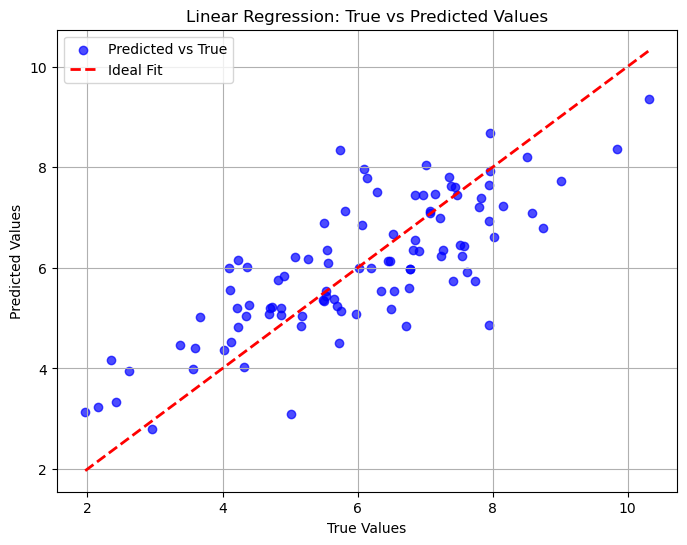

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(42)
n_samples = 100
n_features = 5
X = np.random.rand(n_samples, n_features)  # 100 samples, 5 features
beta_true = np.array([2, -1.5, 3, 0.5, -2])  # True coefficients
Y = 5 + X @ beta_true + np.random.randn(n_samples)  # Adding noise

# Convert to DataFrame
columns = [f"feature_{i+1}" for i in range(n_features)]
df = pd.DataFrame(X, columns=columns)
df["target"] = Y

# Data Preparation
X_b = np.c_[np.ones((n_samples, 1)), df.iloc[:, :-1].values]  # Adding bias term (column of ones)
Y = df["target"].values.reshape(-1, 1)  # Reshaping target variable

# Compute OLS Coefficients
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y  # Applying Normal Equation

# Print Coefficients
print("Linear Regression Coefficients:")
print(f"Intercept: {beta[0][0]:.2f}")
for i, coef in enumerate(beta[1:], start=1):
    print(f"feature_{i}: {coef[0]:.2f}")

# Predict 
Y_pred = X_b @ beta 

# 7. Plot True vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(Y, Y_pred, alpha=0.7, color='b', label='Predicted vs True')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs Predicted Values")
plt.legend()
plt.grid()
plt.show()